<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
- This is the initial and the only visible layer of the neural network. This layer allows us to interact with the nerual network directly by passing our data into it. Input layer must match the format of our input data. In a graphical representation of the neural network architecture, there is one input node for each feature from our dataset being passed to the neural network.

### Hidden Layer:
- Meat and bones of the neural network. This layer can't be accessed directly other than through the input layer. This is the part of the neural network which performs all the computations necessary to provide with the result in the output layer.

### Output Layer:
- Result layer of the neural network computations. Generally speaking, output is modified by the activation function in order to be formated in a shape which can be used to fit our needs as defined in our initial task/question. 

### Neuron:
- Communication channel within the neural network which is comprised of node, weight, bias and activation function. It receives the data, computes and transforms it in order to prepare it for the next layer.

### Weight:
- Numerical value which is used to multiply the input from the previous layer of the neural network. Adjusting the value of the weights is a one of the key ideas in training a neural network.

### Activation Function:
- Each node in the neural network has an activation function. The activation function transforms the data (already multiplied and summed by the weights and bias) in a format which is adequate for the use of the following layer (if the following layer is hidden) or produce the final result (if the layer is output layer). 

### Node Map:
- Graphical represenation of the neural network architecture or topology. A type of flowchart which illustrates the number of inputs, layers as well as weights and bias in easy to read format.

### Perceptron:
- The simplest type of Neural Network, implemented for the first time in 1958. This neural network has no hidden layers. Perceptron can accept any number of features as inputs. Those inputs are then multiplied by appropriate weights, summed up and passed through an activation function to receive the output result.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?
- Initial step of interaction with the neural network begins with passing the information from our data frame into its input layer. The data that we are providing to neural network must be of appropriate format and the number of input layer cells match the number of features that we are providing. Once the data starts flowing from the input layer to the first hidden layer the first calculations occur. Connection between the input layer and the hidden layers contains weights. Weights are numerical values used to multiply the original input value. Every connection between the input layer and the hidden layer contains an individual weights. Once all the multiplications are completed and the results are summed up, bias is added on per layer basis to allow for additional degrees of freedom. Results of the first hidden layer now become inputs of the second hidden layer and the next wave of multiplications by weights and adding of bias is computed. In order to make sure that the each following cell has an appropriate input from the preceiding cell, we apply the acitvation function to the cell where the information is originating from (the only exception being the input layer). In the output layer the activation function is being used to present the prediction result in the format which is suitable for our answer. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [2]:
# Step 1 - reformat the dataframe inputs to work with our neural network. 

inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [0, 0],
    [0, 1],
    [1, 1],
    [0, 0],
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 1],
    [0, 0],
    [0, 1],
    [0, 1],
    [1, 1],
    [0, 0],
])

correct_outputs = [[1], [1], [1], [0], [1], [1], [0], [1], [1], [1], [1], [0], [1], [1], [1], [0], [1]]

In [3]:
# Step 2 - define the Sigmoid activation function and its derivative - to be used for updating weights.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [4]:
# Step 3 - initialize the weights

weights = 2 * np.random.random((2, 1)) - 1
weights

array([[-0.46431438],
       [ 0.47450065]])

In [5]:
# Step 4 - use the function to calculate the correct weights.

def perceptron(inputs, correct_outputs, weights, niter):
    
    for iteration in range(niter):
        
        # Weighted sum of inputs and weights - first step of calculation inside of the hidden layer
        weighted_sum = np.dot(inputs, weights)
        
        # Activate - pass the results from the previous step through the activation function
        activated_outputs = sigmoid(weighted_sum)

        # Calculate the error and the adjustments
        error = correct_outputs - activated_outputs
        adjustments = error * sigmoid_derivative(weighted_sum)
        
        # Update the weights
        weights += np.dot(inputs.T, adjustments)
        
    print("Weights after training")
    print(weights)

    print("Output after training")
    #print(activated_outputs)
    for output in activated_outputs:
        if output < activated_outputs.mean():
            print(0)
        else:
            print(1)

In [6]:
# Step 5 - run the function.

perceptron(inputs, correct_outputs, weights, 10000)

Weights after training
[[-9.99228909]
 [ 5.03910435]]
Output after training
1
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [7]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
print(diabetes.shape)
diabetes.head(20)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [15]:
# Import the necessary libs.
# TODO run the perceptron with both MinMaxScaler, Normalizer and Standard Scaler.

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [9]:
# Get the list of the features.

feats = list(diabetes)[:-1]

# Split the data into X and y vectors.

X = diabetes[feats]
y = diabetes.drop(labels=feats, axis=1)

# Confirm we got the correct shapes.

print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


In [10]:
# Convert the X vector to numpy array by using normalizer.

normalizer = Normalizer()
X = normalizer.fit_transform(X)

# Convert the y vector to numpy array.

y = y.to_numpy()

In [11]:
class Perceptron(object):
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights, this includes the bias in index position 0 and weights to match the shape of the input.
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications, total shown at the end of each epoch.
        self.errors = []

        for i in range(self.niter):
            # Run the appropriate number of epochs as defined in the class call.
            err = 0
            for xi, target in zip(X, y):
                # Zip together the X and y vectors.
                delta_w = self.rate * (target - self.predict(xi))
                # Calculate the error 
                self.weight[1:] += delta_w * xi
                # Update the weights
                self.weight[0] += delta_w
                # Update the bias
                err += int(delta_w != 0.0)
                # Check for the error.
            self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # Take X vector multiply by weights and add bias.
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        # Calculate the predicted result. If above 0 predict 1, otherwise predict 0.
        return np.where(self.net_input(X) >= 0.0, 1, 0)

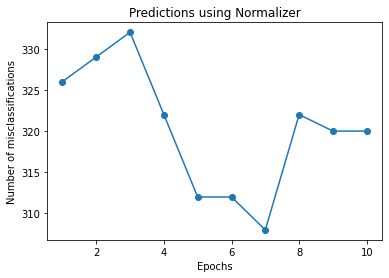

In [12]:
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Predictions using Normalizer')
plt.show()

In [13]:
# Convert the X vector to numpy array by using MinMaxScaler.

min_max_scaler = MinMaxScaler()

X = diabetes[feats]

X = min_max_scaler.fit_transform(X)

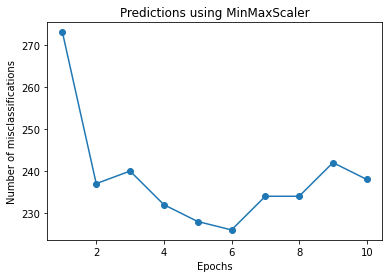

In [14]:
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Predictions using MinMaxScaler')
plt.show()

In [16]:
# Convert the X vector to numpy array by using StandardScaler.

standardscaler = StandardScaler()

X = diabetes[feats]

X = standardscaler.fit_transform(X)

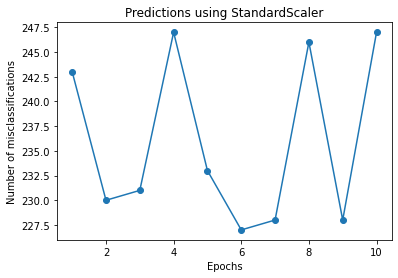

In [17]:
pn = Perceptron()
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Predictions using StandardScaler')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?